# Project: HomePrice Dynamics Analysis: Unveiling Influential Factors Over 20 Years

## objective:

`The project aims to create a comprehensive data science model aimed at elucidating the influence of various factors on home prices observed over the past 20 years. The prime purpose is to discern and quantify the key drivers that have contributed to fluctuations in home prices, thereby facilitating a deeper understanding of the housing market dynamics.`

#### Gathering data & importing datasets files using Pandas

In [100]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [213]:
dataset1 = pd.read_csv('Downloads/MORTGAGE30US (1).csv') # Fixed Rate Mortgage Average in the United States
dataset2 = pd.read_csv('Downloads/ASPUS.csv') # Average Sales Price of Houses in the United States
dataset3 = pd.read_csv('Downloads/CGBD2534.csv') # Unemployment Rate in the United States
dataset4 = pd.read_csv('Downloads/CSUSHPINSA.csv') # Home Price Index in the United States
dataset5 = pd.read_csv('Downloads/CUUR0000SEHA.csv') # CPI: Rent of Residence Average in the United States
dataset6 = pd.read_csv('Downloads/MICH.csv') # CSI:Inflation Expectations in the United States 
dataset7 = pd.read_csv('Downloads/MEHOINUSA672N.csv') # Median Household Income in the United States
dataset8 = pd.read_csv('Downloads/ETOTALUSQ176N.csv') # Housing Inventory Estimate in the United States
dataset9 = pd.read_csv('Downloads/MSACSR.csv') # Monthly Supply of New Houses in the United States
dataset10 = pd.read_csv('Downloads/TTLCONS.csv') # Total Construction Spending: Total Construction in the United States 
dataset11 = pd.read_csv('Downloads/CXUTOTALEXPLB0403M.csv') # Expenditures: Total Average Annual Expenditures

#### EDA (Exploratory Data Analysis) & FE (Feature Engineering)

In [102]:
dataset1.head()

,DATE,MORTGAGE30US
0,1971-04-02,7.33
1,1971-04-09,7.31
2,1971-04-16,7.31
3,1971-04-23,7.31
4,1971-04-30,7.29


In [103]:
dataset1.tail()

,DATE,MORTGAGE30US
2745,2023-11-09,7.50
2746,2023-11-16,7.44
2747,2023-11-22,7.29
2748,2023-11-30,7.22
2749,2023-12-07,7.03


In [104]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2750 entries, 0 to 2749
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DATE          2750 non-null   object 
 1   MORTGAGE30US  2750 non-null   float64
dtypes: float64(1), object(1)
memory usage: 43.1+ KB


In [105]:
dataset1.rename(columns={'MORTGAGE30US':'Fixed Rate Mortgage Average'}, inplace=True)

In [106]:
dataset1['DATE'] = pd.to_datetime(dataset1['DATE'])

In [107]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2750 entries, 0 to 2749
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   DATE                         2750 non-null   datetime64[ns]
 1   Fixed Rate Mortgage Average  2750 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 43.1 KB


In [108]:
start_year = pd.to_datetime('today').year - 20

In [109]:
end_year = pd.to_datetime('today').year

In [110]:
# Filter the DataFrame for the last 20 years 
df1 = dataset1[(dataset1['DATE'].dt.year >= start_year) & (dataset1['DATE'].dt.year <= end_year)]

In [111]:
df1

,DATE,Fixed Rate Mortgage Average
1657,2003-01-03,5.85
1658,2003-01-10,5.95
1659,2003-01-17,5.97
1660,2003-01-24,5.91
1661,2003-01-31,5.90
...,...,...
2745,2023-11-09,7.50
2746,2023-11-16,7.44
2747,2023-11-22,7.29
2748,2023-11-30,7.22


In [112]:
df1.isnull().sum()

DATE                           0
Fixed Rate Mortgage Average    0
dtype: int64

In [113]:
df1.describe()

,DATE,Fixed Rate Mortgage Average
count,1093,1093.000000
mean,2013-06-20 00:28:59.066788864,4.779469
min,2003-01-03 00:00:00,2.650000
25%,2008-03-27 00:00:00,3.850000
50%,2013-06-20 00:00:00,4.530000
75%,2018-09-13 00:00:00,5.870000
max,2023-12-07 00:00:00,7.790000
std,NaN,1.177220


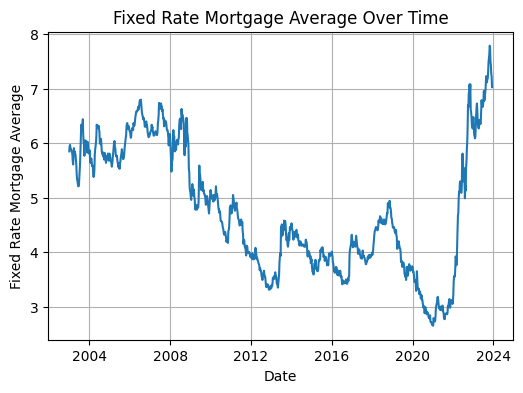

In [114]:
# Plotting using Matplotlib
plt.figure(figsize=(6, 4))
plt.plot(df1['DATE'], df1['Fixed Rate Mortgage Average'])
plt.title('Fixed Rate Mortgage Average Over Time')
plt.xlabel('Date')
plt.ylabel('Fixed Rate Mortgage Average')
plt.grid(True)
plt.show()

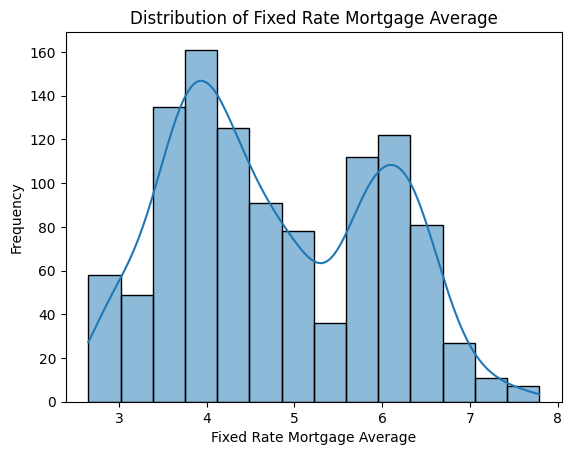

In [115]:
# Ploting using seaborn 
sns.histplot(df1['Fixed Rate Mortgage Average'], kde=True)
plt.title('Distribution of Fixed Rate Mortgage Average')
plt.xlabel('Fixed Rate Mortgage Average')
plt.ylabel('Frequency')
plt.show()

In [116]:
dataset2.head()

,DATE,ASPUS
0,1963-01-01,19300.0
1,1963-04-01,19400.0
2,1963-07-01,19200.0
3,1963-10-01,19600.0
4,1964-01-01,19600.0


In [117]:
dataset2.tail()

,DATE,ASPUS
238,2022-07-01,547800.0
239,2022-10-01,552600.0
240,2023-01-01,505300.0
241,2023-04-01,503000.0
242,2023-07-01,513400.0


In [118]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    243 non-null    object 
 1   ASPUS   243 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.9+ KB


In [119]:
dataset2.rename(columns={'ASPUS':'Average Sales Price of Houses'}, inplace=True)

In [120]:
dataset2['DATE'] = pd.to_datetime(dataset2['DATE'])

In [121]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   DATE                           243 non-null    datetime64[ns]
 1   Average Sales Price of Houses  243 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.9 KB


In [122]:
# Filter the DataFrame for the last 20 years 
df2 = dataset2[(dataset2['DATE'].dt.year >= start_year) & (dataset2['DATE'].dt.year <= end_year)]

In [123]:
df2

,DATE,Average Sales Price of Houses
160,2003-01-01,233100.0
161,2003-04-01,241000.0
162,2003-07-01,248100.0
163,2003-10-01,256000.0
164,2004-01-01,262900.0
...,...,...
238,2022-07-01,547800.0
239,2022-10-01,552600.0
240,2023-01-01,505300.0
241,2023-04-01,503000.0


In [124]:
df2.isnull().sum()

DATE                             0
Average Sales Price of Houses    0
dtype: int64

In [125]:
df2.describe()

,DATE,Average Sales Price of Houses
count,83,83.000000
mean,2013-04-01 03:28:11.566265088,341625.301205
min,2003-01-01 00:00:00,233100.000000
25%,2008-02-15 12:00:00,280350.000000
50%,2013-04-01 00:00:00,322100.000000
75%,2018-05-16 12:00:00,376800.000000
max,2023-07-01 00:00:00,552600.000000
std,NaN,77332.835993


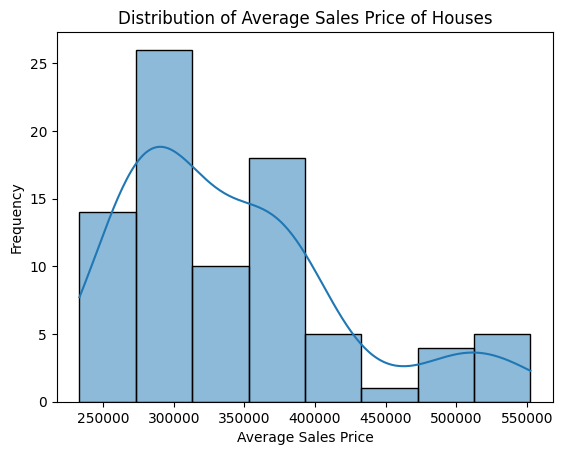

In [127]:
sns.histplot(df2['Average Sales Price of Houses'], kde=True)
plt.title('Distribution of Average Sales Price of Houses')
plt.xlabel('Average Sales Price')
plt.ylabel('Frequency')
plt.show()

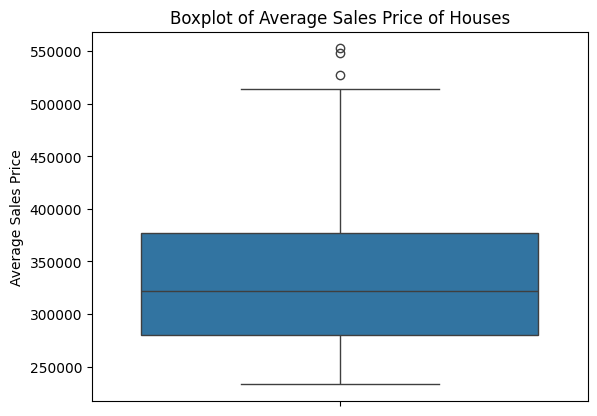

In [128]:
sns.boxplot(data=df2, y='Average Sales Price of Houses')
plt.title('Boxplot of Average Sales Price of Houses')
plt.ylabel('Average Sales Price')
plt.show()

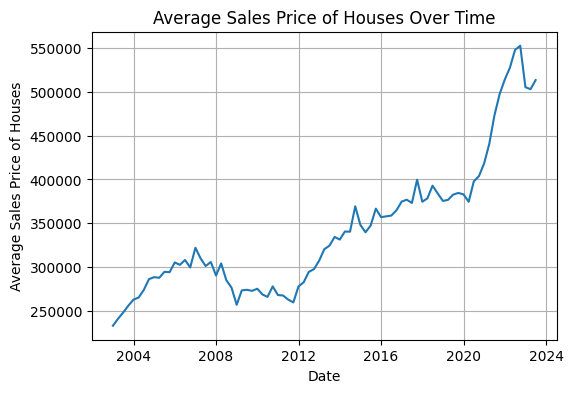

In [129]:
# Plotting using Matplotlib
plt.figure(figsize=(6, 4))
plt.plot(df2['DATE'], df2['Average Sales Price of Houses'])
plt.title('Average Sales Price of Houses Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sales Price of Houses')
plt.grid(True)
plt.show()

In [131]:
dataset3.head()

,DATE,CGBD2534
0,2000-01-01,2.1
1,2000-02-01,1.4
2,2000-03-01,1.6
3,2000-04-01,1.5
4,2000-05-01,1.9


In [132]:
dataset3.tail()

,DATE,CGBD2534
282,2023-07-01,3.1
283,2023-08-01,3.1
284,2023-09-01,2.7
285,2023-10-01,3.1
286,2023-11-01,2.7


In [133]:
dataset3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DATE      287 non-null    object 
 1   CGBD2534  287 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.6+ KB


In [134]:
 dataset3.rename(columns ={'CGBD2534':'Unemployment Rate'},inplace = True)

In [135]:
dataset3['DATE'] = pd.to_datetime(dataset3['DATE'])

In [136]:
dataset3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   DATE               287 non-null    datetime64[ns]
 1   Unemployment Rate  287 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.6 KB


In [137]:
# Filter the DataFrame for the last 20 years 
df3 = dataset3[(dataset3['DATE'].dt.year >= start_year) & (dataset3['DATE'].dt.year <= end_year)]

In [138]:
df3

,DATE,Unemployment Rate
36,2003-01-01,3.9
37,2003-02-01,3.1
38,2003-03-01,3.2
39,2003-04-01,3.2
40,2003-05-01,2.9
...,...,...
282,2023-07-01,3.1
283,2023-08-01,3.1
284,2023-09-01,2.7
285,2023-10-01,3.1


In [140]:
df3.isnull().sum()

DATE                 0
Unemployment Rate    0
dtype: int64

In [141]:
df3.describe()

,DATE,Unemployment Rate
count,251,251.000000
mean,2013-06-01 02:23:25.577689344,3.411952
min,2003-01-01 00:00:00,1.500000
25%,2008-03-16 12:00:00,2.500000
50%,2013-06-01 00:00:00,2.900000
75%,2018-08-16 12:00:00,4.100000
max,2023-11-01 00:00:00,10.600000
std,NaN,1.380528


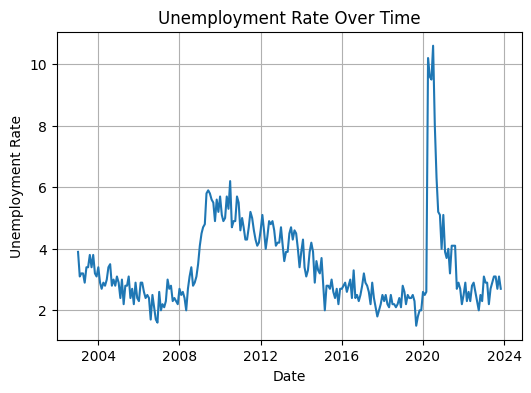

In [142]:
# Plotting using Matplotlib
plt.figure(figsize=(6, 4))
plt.plot(df3['DATE'], df3['Unemployment Rate'])
plt.title('Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.grid(True)
plt.show()

In [143]:
dataset4.head()

,DATE,CSUSHPINSA
0,1987-01-01,63.735
1,1987-02-01,64.135
2,1987-03-01,64.470
3,1987-04-01,64.973
4,1987-05-01,65.547


In [144]:
dataset4.tail()

,DATE,CSUSHPINSA
436,2023-05-01,305.410
437,2023-06-01,308.282
438,2023-07-01,310.110
439,2023-08-01,311.392
440,2023-09-01,312.313


In [145]:
dataset4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DATE        441 non-null    object 
 1   CSUSHPINSA  441 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.0+ KB


In [146]:
 dataset4.rename(columns ={'CSUSHPINSA':'Home Price Index'},inplace = True)

In [147]:
dataset4['DATE'] = pd.to_datetime(dataset4['DATE'])

In [148]:
dataset4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   DATE              441 non-null    datetime64[ns]
 1   Home Price Index  441 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.0 KB


In [149]:
# Filter the DataFrame for the last 20 years 
df4 = dataset4[(dataset4['DATE'].dt.year >= start_year) & (dataset4['DATE'].dt.year <= end_year)]

In [150]:
df4

,DATE,Home Price Index
192,2003-01-01,127.652
193,2003-02-01,128.326
194,2003-03-01,129.308
195,2003-04-01,130.488
196,2003-05-01,131.839
...,...,...
436,2023-05-01,305.410
437,2023-06-01,308.282
438,2023-07-01,310.110
439,2023-08-01,311.392


In [151]:
df4.isnull().sum()

DATE                0
Home Price Index    0
dtype: int64

In [152]:
df4.describe()

,DATE,Home Price Index
count,249,249.000000
mean,2013-05-01 15:54:13.012048128,185.104944
min,2003-01-01 00:00:00,127.652000
25%,2008-03-01 00:00:00,148.585000
50%,2013-05-01 00:00:00,175.038000
75%,2018-07-01 00:00:00,204.209000
max,2023-09-01 00:00:00,312.313000
std,NaN,46.650931


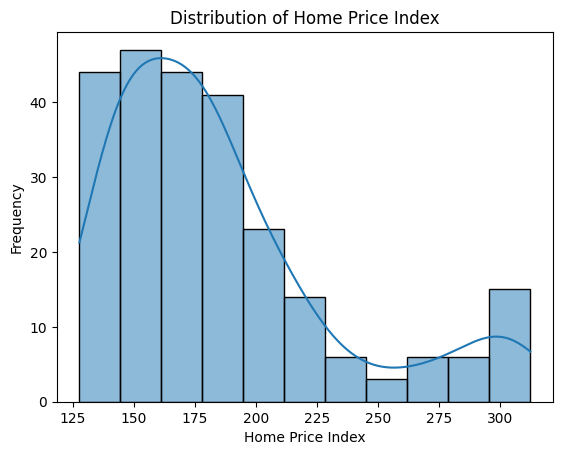

In [153]:
sns.histplot(df4['Home Price Index'], kde=True)
plt.title('Distribution of Home Price Index')
plt.xlabel('Home Price Index')
plt.ylabel('Frequency')
plt.show()

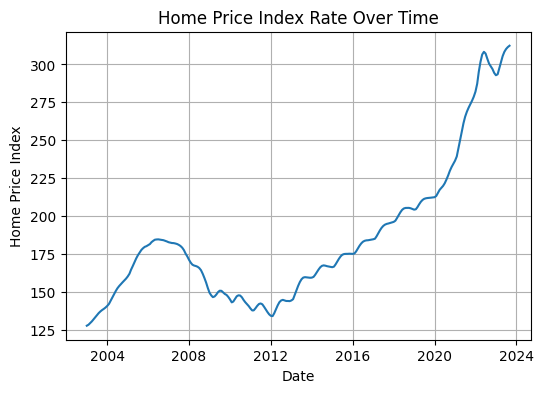

In [154]:
# Plotting using Matplotlib
plt.figure(figsize=(6, 4))
plt.plot(df4['DATE'], df4['Home Price Index'])
plt.title('Home Price Index Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Home Price Index')
plt.grid(True)
plt.show()

In [155]:
dataset5.head()

,DATE,CUUR0000SEHA
0,1914-12-01,21.000
1,1915-01-01,.
2,1915-02-01,.
3,1915-03-01,.
4,1915-04-01,.


In [156]:
dataset5.tail()

,DATE,CUUR0000SEHA
1302,2023-06-01,398.593
1303,2023-07-01,400.210
1304,2023-08-01,402.247
1305,2023-09-01,404.487
1306,2023-10-01,406.683


In [157]:
dataset5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1307 entries, 0 to 1306
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   DATE          1307 non-null   object
 1   CUUR0000SEHA  1307 non-null   object
dtypes: object(2)
memory usage: 20.5+ KB


In [158]:
 dataset5.rename(columns ={'CUUR0000SEHA':'CPI: Rent of Residence Average'},inplace = True) # CPI Stands for: Consumer Price Index

In [159]:
dataset5['DATE'] = pd.to_datetime(dataset5['DATE'])

In [160]:
dataset5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1307 entries, 0 to 1306
Data columns (total 2 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   DATE                            1307 non-null   datetime64[ns]
 1   CPI: Rent of Residence Average  1307 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 20.5+ KB


In [161]:
# Filter the DataFrame for the last 20 years 
df5 = dataset5[(dataset5['DATE'].dt.year >= start_year) & (dataset5['DATE'].dt.year <= end_year)]

In [162]:
df5

,DATE,CPI: Rent of Residence Average
1057,2003-01-01,203.300
1058,2003-02-01,203.700
1059,2003-03-01,204.100
1060,2003-04-01,204.500
1061,2003-05-01,204.900
...,...,...
1302,2023-06-01,398.593
1303,2023-07-01,400.210
1304,2023-08-01,402.247
1305,2023-09-01,404.487


In [163]:
df5.isnull().sum()

DATE                              0
CPI: Rent of Residence Average    0
dtype: int64

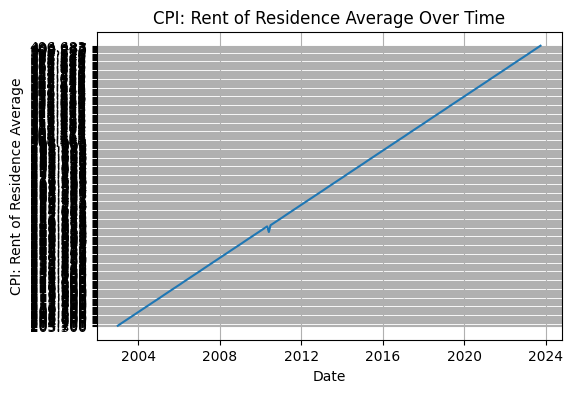

In [165]:
# Plotting using Matplotlib
plt.figure(figsize=(6, 4))
plt.plot(df5['DATE'], df5['CPI: Rent of Residence Average'])
plt.title('CPI: Rent of Residence Average Over Time')
plt.xlabel('Date')
plt.ylabel('CPI: Rent of Residence Average')
plt.grid(True)
plt.show()

In [166]:
dataset6.head()

,DATE,MICH
0,1978-01-01,5.2
1,1978-02-01,6.4
2,1978-03-01,6.3
3,1978-04-01,6.7
4,1978-05-01,6.9


In [168]:
dataset6.tail()

,DATE,MICH
545,2023-06-01,3.3
546,2023-07-01,3.4
547,2023-08-01,3.5
548,2023-09-01,3.2
549,2023-10-01,4.2


In [169]:
dataset6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    550 non-null    object 
 1   MICH    550 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.7+ KB


In [170]:
 dataset6.rename(columns ={'MICH':'CSI:Inflation Expectations'},inplace = True) # CSI Stands for:Consumer Sentiment Index

In [171]:
dataset6['DATE'] = pd.to_datetime(dataset6['DATE'])

In [172]:
dataset6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   DATE                        550 non-null    datetime64[ns]
 1   CSI:Inflation Expectations  550 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.7 KB


In [173]:
# Filter the DataFrame for the last 20 years 
df6 = dataset6[(dataset6['DATE'].dt.year >= 2003) & (dataset6['DATE'].dt.year <= 2023)]

In [174]:
df6

,DATE,CSI:Inflation Expectations
300,2003-01-01,2.5
301,2003-02-01,2.7
302,2003-03-01,3.1
303,2003-04-01,2.4
304,2003-05-01,2.0
...,...,...
545,2023-06-01,3.3
546,2023-07-01,3.4
547,2023-08-01,3.5
548,2023-09-01,3.2


In [176]:
df6.isnull().sum()

DATE                          0
CSI:Inflation Expectations    0
dtype: int64

In [175]:
df6.describe()

,DATE,CSI:Inflation Expectations
count,250,250.00000
mean,2013-05-16 21:07:12,3.16920
min,2003-01-01 00:00:00,1.70000
25%,2008-03-08 18:00:00,2.70000
50%,2013-05-16 12:00:00,3.00000
75%,2018-07-24 06:00:00,3.30000
max,2023-10-01 00:00:00,5.40000
std,NaN,0.75206


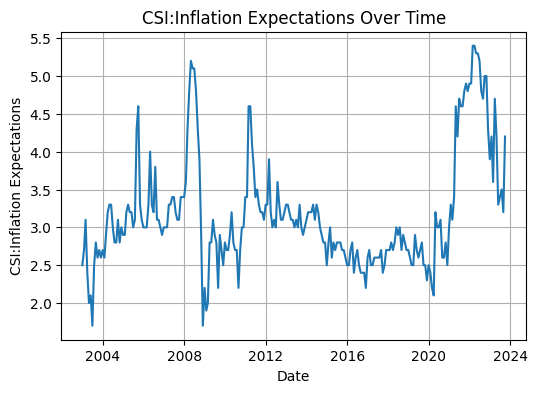

In [177]:
# Plotting using Matplotlib
plt.figure(figsize=(6, 4))
plt.plot(df6['DATE'], df6['CSI:Inflation Expectations'])
plt.title('CSI:Inflation Expectations Over Time')
plt.xlabel('Date')
plt.ylabel('CSI:Inflation Expectations')
plt.grid(True)
plt.show()

In [178]:
dataset7.head()

,DATE,MEHOINUSA672N
0,1984-01-01,56780
1,1985-01-01,57860
2,1986-01-01,60010
3,1987-01-01,60760
4,1988-01-01,61210


In [179]:
dataset7.tail()

,DATE,MEHOINUSA672N
34,2018-01-01,73030
35,2019-01-01,78250
36,2020-01-01,76660
37,2021-01-01,76330
38,2022-01-01,74580


In [180]:
dataset7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   DATE           39 non-null     object
 1   MEHOINUSA672N  39 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 752.0+ bytes


In [181]:
dataset7.rename(columns ={'MEHOINUSA672N':'Median Household Income'},inplace = True)

In [182]:
dataset7['DATE'] = pd.to_datetime(dataset7['DATE'])

In [183]:
dataset7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   DATE                     39 non-null     datetime64[ns]
 1   Median Household Income  39 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 752.0 bytes


In [184]:
# Filter the DataFrame for the last 20 years 
df7 = dataset7[(dataset7['DATE'].dt.year >= 2003) & (dataset7['DATE'].dt.year <= 2022)]

In [185]:
df7

,DATE,Median Household Income
19,2003-01-01,65860
20,2004-01-01,65760
21,2005-01-01,66780
22,2006-01-01,67520
23,2007-01-01,68610
24,2008-01-01,66280
25,2009-01-01,65850
26,2010-01-01,64300
27,2011-01-01,63350
28,2012-01-01,63350


In [186]:
df7.isnull().sum()

DATE                       0
Median Household Income    0
dtype: int64

In [187]:
df7.describe()

,DATE,Median Household Income
count,20,20.000000
mean,2012-07-02 00:00:00,68924.500000
min,2003-01-01 00:00:00,63350.000000
25%,2007-10-01 18:00:00,65755.000000
50%,2012-07-02 00:00:00,67150.000000
75%,2017-04-02 06:00:00,72325.000000
max,2022-01-01 00:00:00,78250.000000
std,NaN,4683.867582


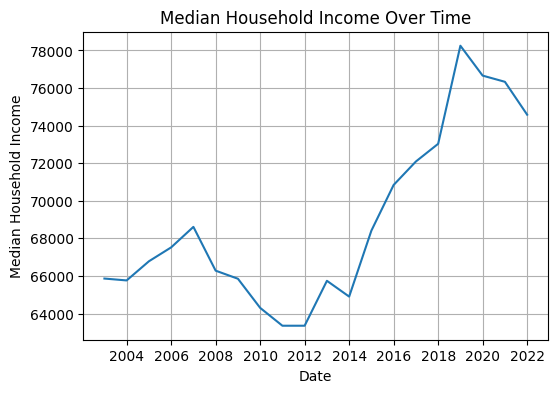

In [188]:
# Plotting using Matplotlib
plt.figure(figsize=(6, 4))
plt.plot(df7['DATE'], df7['Median Household Income'])
plt.title('Median Household Income Over Time')
plt.xlabel('Date')
plt.ylabel('Median Household Income')
plt.grid(True)
plt.show()

In [214]:
dataset8.head()

,DATE,ETOTALUSQ176N
0,2000-04-01,116047.0
1,2000-07-01,116482.0
2,2000-10-01,116914.0
3,2001-01-01,117347.0
4,2001-04-01,117786.0


In [215]:
dataset8.tail()

,DATE,ETOTALUSQ176N
89,2022-07-01,143923.0
90,2022-10-01,144332.0
91,2023-01-01,144740.0
92,2023-04-01,145149.0
93,2023-07-01,145558.0


In [216]:
dataset8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DATE           94 non-null     object 
 1   ETOTALUSQ176N  94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [217]:
dataset8.rename(columns={'ETOTALUSQ176N':'Housing Inventory Estimate'}, inplace=True)

In [218]:
dataset8['DATE'] = pd.to_datetime(dataset8['DATE'])

In [219]:
dataset8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   DATE                        94 non-null     datetime64[ns]
 1   Housing Inventory Estimate  94 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.6 KB


In [220]:
# Filter the DataFrame for the last 20 years 
df8 = dataset8[(dataset8['DATE'].dt.year >= start_year) & (dataset8['DATE'].dt.year <= end_year)]

In [221]:
df8

,DATE,Housing Inventory Estimate
11,2003-01-01,120792.0
12,2003-04-01,121233.0
13,2003-07-01,121682.0
14,2003-10-01,122159.0
15,2004-01-01,122632.0
...,...,...
89,2022-07-01,143923.0
90,2022-10-01,144332.0
91,2023-01-01,144740.0
92,2023-04-01,145149.0


In [222]:
df8.isnull().sum()

DATE                          0
Housing Inventory Estimate    0
dtype: int64

In [223]:
df8.describe()

,DATE,Housing Inventory Estimate
count,83,83.000000
mean,2013-04-01 03:28:11.566265088,133730.927711
min,2003-01-01 00:00:00,120792.000000
25%,2008-02-15 12:00:00,130135.500000
50%,2013-04-01 00:00:00,133408.000000
75%,2018-05-16 12:00:00,138345.500000
max,2023-07-01 00:00:00,145558.000000
std,NaN,6287.247765


In [207]:
df8.describe()

,DATE,Housing Inventory Estimate
count,83,83.000000
mean,2013-04-01 03:28:11.566265088,133730.927711
min,2003-01-01 00:00:00,120792.000000
25%,2008-02-15 12:00:00,130135.500000
50%,2013-04-01 00:00:00,133408.000000
75%,2018-05-16 12:00:00,138345.500000
max,2023-07-01 00:00:00,145558.000000
std,NaN,6287.247765


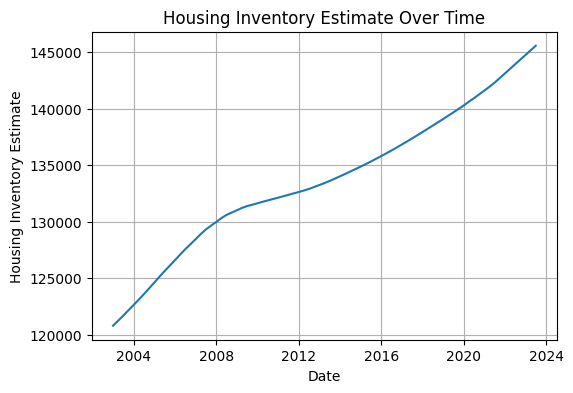

In [225]:
# Plotting using Matplotlib
plt.figure(figsize=(6, 4))
plt.plot(df8['DATE'], df8['Housing Inventory Estimate'])
plt.title('Housing Inventory Estimate Over Time')
plt.xlabel('Date')
plt.ylabel('Housing Inventory Estimate')
plt.grid(True)
plt.show()

In [226]:
dataset9.head()

,DATE,MSACSR
0,1980-02-01,8.6
1,1980-03-01,9.8
2,1980-04-01,11.6
3,1980-05-01,9.2
4,1980-06-01,7.6


In [227]:
dataset9.tail()

,DATE,MSACSR
520,2023-06-01,7.5
521,2023-07-01,7.1
522,2023-08-01,7.8
523,2023-09-01,7.2
524,2023-10-01,7.8


In [228]:
dataset9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525 entries, 0 to 524
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    525 non-null    object 
 1   MSACSR  525 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.3+ KB


In [229]:
dataset9.rename(columns={'MSACSR':'Monthly Supply of New Houses'}, inplace=True)

In [230]:
dataset9['DATE'] = pd.to_datetime(dataset9['DATE'])

In [231]:
dataset9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525 entries, 0 to 524
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   DATE                          525 non-null    datetime64[ns]
 1   Monthly Supply of New Houses  525 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.3 KB


In [232]:
# Filter the DataFrame for the last 20 years 
df9 = dataset9[(dataset9['DATE'].dt.year >= start_year) & (dataset9['DATE'].dt.year <= end_year)]

In [233]:
df9

,DATE,Monthly Supply of New Houses
275,2003-01-01,4.0
276,2003-02-01,4.5
277,2003-03-01,4.1
278,2003-04-01,4.1
279,2003-05-01,3.9
...,...,...
520,2023-06-01,7.5
521,2023-07-01,7.1
522,2023-08-01,7.8
523,2023-09-01,7.2


In [234]:
df9.isnull().sum()

DATE                            0
Monthly Supply of New Houses    0
dtype: int64

In [235]:
df9.describe()

,DATE,Monthly Supply of New Houses
count,250,250.000000
mean,2013-05-16 21:07:12,6.199600
min,2003-01-01 00:00:00,3.300000
25%,2008-03-08 18:00:00,4.900000
50%,2013-05-16 12:00:00,5.600000
75%,2018-07-24 06:00:00,7.300000
max,2023-10-01 00:00:00,12.200000
std,NaN,1.938233


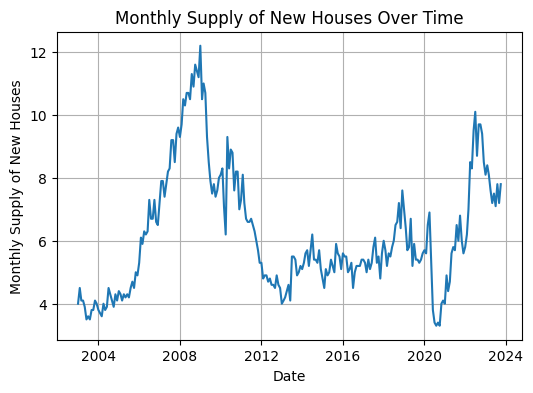

In [236]:
# Plotting using Matplotlib
plt.figure(figsize=(6, 4))
plt.plot(df9['DATE'], df9['Monthly Supply of New Houses'])
plt.title('Monthly Supply of New Houses Over Time')
plt.xlabel('Date')
plt.ylabel('Monthly Supply of New Houses')
plt.grid(True)
plt.show()

In [237]:
dataset10.head()

,DATE,TTLCONS
0,1993-01-01,458080.0
1,1993-02-01,462967.0
2,1993-03-01,458399.0
3,1993-04-01,469425.0
4,1993-05-01,468998.0


In [239]:
dataset10.tail()

,DATE,TTLCONS
365,2023-06-01,1956226.0
366,2023-07-01,1969005.0
367,2023-08-01,2010143.0
368,2023-09-01,2014718.0
369,2023-10-01,2027072.0


In [240]:
dataset10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370 entries, 0 to 369
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     370 non-null    object 
 1   TTLCONS  370 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.9+ KB


In [241]:
dataset10.rename(columns={'TTLCONS':'Total Construction Spending'}, inplace=True)

In [242]:
dataset10['DATE'] = pd.to_datetime(dataset10['DATE'])

In [243]:
dataset10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370 entries, 0 to 369
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   DATE                         370 non-null    datetime64[ns]
 1   Total Construction Spending  370 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.9 KB


In [244]:
# Filter the DataFrame for the last 20 years 
df10 = dataset10[(dataset10['DATE'].dt.year >= start_year) & (dataset10['DATE'].dt.year <= end_year)]

In [245]:
df10

,DATE,Total Construction Spending
120,2003-01-01,863855.0
121,2003-02-01,859225.0
122,2003-03-01,851132.0
123,2003-04-01,859459.0
124,2003-05-01,866814.0
...,...,...
365,2023-06-01,1956226.0
366,2023-07-01,1969005.0
367,2023-08-01,2010143.0
368,2023-09-01,2014718.0


In [253]:
filtered_df10.isnull().sum()

DATE                           0
Total Construction Spending    0
dtype: int64

In [246]:
df10.describe()

,DATE,Total Construction Spending
count,250,2.500000e+02
mean,2013-05-16 21:07:12,1.183392e+06
min,2003-01-01 00:00:00,7.583760e+05
25%,2008-03-08 18:00:00,9.299162e+05
50%,2013-05-16 12:00:00,1.135420e+06
75%,2018-07-24 06:00:00,1.333880e+06
max,2023-10-01 00:00:00,2.027072e+06
std,NaN,3.161009e+05


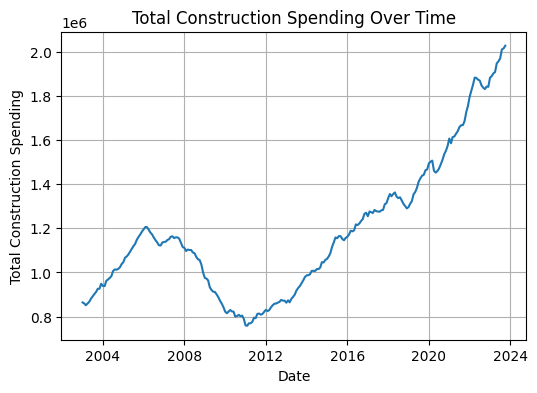

In [247]:
# Plotting using Matplotlib
plt.figure(figsize=(6, 4))
plt.plot(df10['DATE'], df10['Total Construction Spending'])
plt.title('Total Construction Spending Over Time')
plt.xlabel('Date')
plt.ylabel('Total Construction Spending')
plt.grid(True)
plt.show()

In [248]:
dataset11.head()

,DATE,CXUTOTALEXPLB0403M
0,1984-01-01,22294
1,1985-01-01,23349
2,1986-01-01,23931
3,1987-01-01,24177
4,1988-01-01,25770


In [249]:
dataset11.tail()

,DATE,CXUTOTALEXPLB0403M
34,2018-01-01,56457
35,2019-01-01,57128
36,2020-01-01,57644
37,2021-01-01,63905
38,2022-01-01,67883


In [250]:
dataset11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   DATE                39 non-null     object
 1   CXUTOTALEXPLB0403M  39 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 752.0+ bytes


In [251]:
dataset11.rename(columns={'CXUTOTALEXPLB0403M':'Total Avg Annual Expenditures'}, inplace=True)

In [252]:
dataset11['DATE'] = pd.to_datetime(dataset11['DATE'])

In [253]:
dataset11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   DATE                           39 non-null     datetime64[ns]
 1   Total Avg Annual Expenditures  39 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 752.0 bytes


In [254]:
# Filter the DataFrame for the last 20 years 
df11 = dataset11[(dataset11['DATE'].dt.year >= start_year) & (dataset11['DATE'].dt.year <= end_year)]

In [255]:
df11

,DATE,Total Avg Annual Expenditures
19,2003-01-01,40525
20,2004-01-01,42701
21,2005-01-01,45068
22,2006-01-01,47582
23,2007-01-01,47510
24,2008-01-01,48159
25,2009-01-01,46494
26,2010-01-01,46617
27,2011-01-01,48097
28,2012-01-01,49544


In [256]:
df11.isnull().sum()

DATE                             0
Total Avg Annual Expenditures    0
dtype: int64

In [257]:
df11.describe()

,DATE,Total Avg Annual Expenditures
count,20,20.000000
mean,2012-07-02 00:00:00,51158.650000
min,2003-01-01 00:00:00,40525.000000
25%,2007-10-01 18:00:00,47286.750000
50%,2012-07-02 00:00:00,48851.500000
75%,2017-04-02 06:00:00,55608.000000
max,2022-01-01 00:00:00,67883.000000
std,NaN,6852.343443


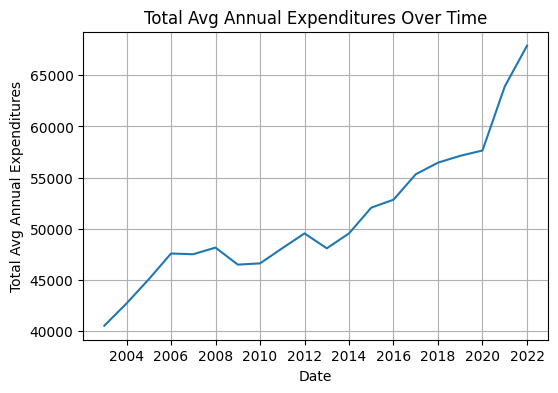

In [258]:
# Plotting using Matplotlib
plt.figure(figsize=(6, 4))
plt.plot(df11['DATE'], df11['Total Avg Annual Expenditures'])
plt.title('Total Avg Annual Expenditures Over Time')
plt.xlabel('Date')
plt.ylabel('Total Avg Annual Expenditures')
plt.grid(True)
plt.show()

# Building Model

##### Making use of scikit-learn Library

In [259]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

##### Merging DataFrame for further Modeling processes

In [260]:
# Merging the DataFrames on the 'DATE' column using outer join
merged_df = df1.merge(df2, on='DATE', how='outer')
merged_df = merged_df.merge(df3, on='DATE', how='outer')
merged_df = merged_df.merge(df4, on='DATE', how='outer')
merged_df = merged_df.merge(df5, on='DATE', how='outer')
merged_df = merged_df.merge(df6, on='DATE', how='outer')
merged_df = merged_df.merge(df7, on='DATE', how='outer')
merged_df = merged_df.merge(df8, on='DATE', how='outer')
merged_df = merged_df.merge(df9, on='DATE', how='outer')
merged_df = merged_df.merge(df10, on='DATE', how='outer')
merged_df = merged_df.merge(df11, on='DATE', how='outer')

In [261]:
# Ensuring 'DATE' is timestamp column
merged_df['DATE'] = pd.to_datetime(merged_df['DATE'])

In [262]:
import datetime as dt
# Convert to Unix timestamps
merged_df['UNIX_DATE'] = merged_df['DATE'].apply(lambda x: int(dt.datetime.timestamp(x)))

##### Segregating Independent and Dependent Variables

In [263]:
# Separating predictors and target variable
X = merged_df[['UNIX_DATE', 'Fixed Rate Mortgage Average', 'Average Sales Price of Houses', 'Unemployment Rate', 'CPI: Rent of Residence Average', 'CSI:Inflation Expectations', 'Median Household Income', 'Housing Inventory Estimate', 'Monthly Supply of New Houses', 'Total Construction Spending', 'Total Avg Annual Expenditures']]
y = merged_df['Home Price Index']

##### Spliting into Training and Testing Sets

In [264]:
# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### Handling Missing values by SimpleImputer:Strategy- Mean

In [265]:
# Initialize SimpleImputer with mean strategy
imputer = SimpleImputer(strategy='mean')

In [266]:
# Impute missing values using SimpleImputer with mean strategy on training data
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

In [267]:
# Impute missing values using SimpleImputer with mean strategy on testing data
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

In [268]:
# Fit and transform y_train
y_train_imputed = imputer.fit_transform(y_train.values.reshape(-1, 1))

In [269]:
# Transform y_test
y_test_imputed = imputer.transform(y_test.values.reshape(-1, 1))

##### Fitting Model to the Training data

In [270]:
# Initialize and fit the model
model = LinearRegression()
model.fit(X_train_imputed, y_train_imputed)

LinearRegression()

##### Applying Trained Model to Test-set to generate Predictions

In [271]:
# Predict on the imputed test set
y_pred = model.predict(X_test_imputed)

#  Model evaluation

#### Mean Squared Error

In [272]:
mse = mean_squared_error(y_test_imputed, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 9.939815873206333


#### R-squared Score

In [273]:
r_squared = r2_score(y_test_imputed, y_pred)

print(f"R^2 Score: {r_squared}")

R^2 Score: 0.9803391344324744


#### Adjusted R-squared Score

In [274]:
n = len(y_test_imputed)  # Number of samples in test set
p = X_test_imputed.shape[1]  # Number of predictors
adjusted_r_squared = 1 - (1 - r_squared) * ((n - 1) / (n - p - 1))

print(f"Adjusted R-squared: {adjusted_r_squared}")

Adjusted R-squared: 0.9794775028737382


#### Root Mean Squared Error (RMSE)

In [275]:
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 3.1527473532153403


#### Cross-Validation Score

In [276]:
from sklearn.model_selection import cross_val_score

# Initialize the model
model = LinearRegression()

# Perform 10-fold cross-validation and specify scoring (e.g., 'neg_mean_squared_error' for MSE)
scores = cross_val_score(model, X_train_imputed, y_train_imputed, cv=10, scoring='neg_mean_squared_error')

# Get the average score
avg_mse = -scores.mean()
print("Average MSE from 5-fold CV:", avg_mse)

Average MSE from 5-fold CV: 25.147711044715194


# Model Conclusion

##### **Model Performance Summary:**

 `The data science model constructed for this investigation demonstrates exceptional proficiency in assessing and forecasting home prices based on an array of pertinent features. Rigorous evaluation of the model yielded impressive performance metrics, indicative of its reliability and predictive prowess.`







##### **Key Findings:**

- `Mean Squared Error (MSE): The model achieves a low MSE of approximately 9.94, signifying minimal average squared differences between predicted and actual home prices. This underscores the model's precision in forecasting.`







- `R-squared Score: With an score of about 0.98, the model elucidates approximately 98% of the variability in home prices, highlighting its strong ability to capture the nuances of the housing market.`

- `Adjusted R-squared: The adjusted R-squared value of approximately 0.98 reflects the substantial impact of selected features on the model's predictive capacity, accounting for the number of features utilized.`

- `Root Mean Squared Error (RMSE): The RMSE of around 3.15 provides a clear measure of the average magnitude of errors in the model's price predictions.`

- `Average MSE from 10-fold Cross-Validation: The consistent average MSE of approximately 25.15 across 10-fold cross-validation folds underscores the model's robustness and stability.`

##### **Conclusion**

`This data science model serves as a powerful tool in uncovering the underlying factors that have influenced home prices over the last two decades. Its ability to accurately forecast prices and explain a significant portion of the variability signifies its utility in dissecting housing market trends.`

`The insights gleaned from this model not only aid in understanding past price fluctuations but also hold promise in informing future projections and strategic decision-making in real estate and related sectors. Continued validation and monitoring are pivotal to ensuring the model's ongoing effectiveness and reliability in practical applications.`